In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')
data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

# Content

<ul style="font-size:18px">
    <li>Facts about space exploration</li>
    <li>Description of Data</li>
    <li>Status of Rockets and Missions</li>
    <li>More coming in next versions</li>
</ul>

<img src="https://room.eu.com/images/contents/Space-image.jpg">

# Space Exploration

<p style="font-size:18px">Space exploration is the use of astronomy and space technology to explore outer space. While the exploration of space is carried out mainly by astronomers with telescopes, its physical exploration though is conducted both by unmanned robotic space probes and human spaceflight. Space exploration, like its classical form astronomy, is one of the main sources for space science. <a href="https://en.wikipedia.org/wiki/Space_exploration">Source</a></p>

<h2>Facts about Space Exploration</h2>

<ol style="font-size:18px">
    <li>The Apollo 11 moonwalkers had no insurance</li>
    <li>Sputnik, by the Soviet Union stunned the world</li>
    <li>The first pooch to orbit the earth was a stray</li>
    <li>The ashes of Pluto’s discoverer orbit the dwarf planet</li>
    <li>The first monkey to be sent into space launched from New Mexico on 11 June 1948. Albert I, a rhesus monkey. <a href="https://www.historyextra.com/period/modern/5-historical-space-travel-facts/">Source</a></li>
</ol>

# Description of Data

In [2]:
fig = data.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Unique Value Count Plot', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

In [3]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title='Missing Value Plot', xaxis_title='Variables', yaxis_title='Missing value count')
fig.show()

<p style="font-size:18px">The Rocket variable contains the mission cost for that rocket. It seems to be missing for a quite considerable number of missions.</p>

<p style="font-size:18px">For using the data for any patterns, will need to remove this variable although this is the only continuous variable in the data.</p>

# Status of Rockets and Missions

In [4]:
fig = data['Status Rocket'].value_counts().reset_index().plot(kind='bar', x='index', y='Status Rocket', color='Status Rocket')
fig.update_layout(title='Status of all Rockets', xaxis_title='Rocket Status', yaxis_title='Count')
fig.show()

In [5]:
fig = data['Status Mission'].value_counts().reset_index().plot(kind='bar', x='index', y='Status Mission', color='Status Mission')
fig.update_layout(title='Status of all Missions', xaxis_title='Mission Status', yaxis_title='Count')
fig.show()

<p style="font-size:18px">Seems it's going to be a multi class problem that too imbalanced in case I later decide on building some model on it.</p>

# Companies with most launches

In [6]:
fig = data['Company Name'].value_counts().reset_index().head(11).plot(kind='bar',x='index',y='Company Name',color='Company Name')
fig.update_layout(title='Company with most Rocket launches',xaxis_title='Company', yaxis_title='No of Rocket launches')
fig.show()

# Launch by companies divided by status

In [7]:
best_com = data['Company Name'].value_counts().reset_index().head(11)['index'].tolist()
df = data[['Company Name','Status Mission']].copy().reset_index()
df['Count'] = df.groupby(['Status Mission','Company Name'])['index'].transform('count')
df = df[df['Company Name'].isin(best_com)]
df = df.drop('index',axis=1).drop_duplicates().reset_index(drop=True)
fig = df.plot(kind='bar', x='Company Name', y='Count', color='Status Mission', barmode='group')
fig.update_layout(title='Segmentation of launches by companies based on status',xaxis_title='Company',yaxis_title='Number of launches')
fig.show()

# Most common locations for launches

In [8]:
fig = data['Location'].value_counts().reset_index().head(11).plot(kind='bar',y='index',x='Location',color='Location')
fig.update_layout(title='Locations with most Rocket launches',yaxis_title='Location', xaxis_title='No of Rocket launches')
fig.show()

# Years with most launches

In [9]:
data['Date'] = pd.to_datetime(data['Datum'], utc=True)
data['year'] = data['Date'].apply(lambda x: x.year).astype('int')
fig = data['year'].value_counts().reset_index().plot(kind='bar',x='index',y='year',color='year')
fig.update_layout(title='Years with most Rocket launches',xaxis_title='year', yaxis_title='No of Rocket launches')
fig.show()

# Which months are most launches made on

In [10]:
data['month'] = data['Date'].apply(lambda x: x.month).astype('int')
fig = data['month'].value_counts().reset_index().plot(kind='bar',x='index',y='month',color='month')
fig.update_layout(title='Months with most Rocket launches',xaxis_title='month', yaxis_title='No of Rocket launches')
fig.show()

<p style='font-size: 18px'>It can be clearly noticed that most launches are made at the middle and towards the end of the year</p>

# Let's check the success rate of the companies

In [11]:
count = data['Company Name'].value_counts().reset_index()
success = data.loc[data['Status Mission']=='Success','Company Name'].value_counts().reset_index()

merged = count.merge(success, on='index')
merged['success_rate'] = (merged['Company Name_y'] / merged['Company Name_x'])*100
merged = merged.head(15)

fig = merged.plot(kind='bar', x='index', y='success_rate', color='Company Name_x')
fig.update_layout(title='Success Rate of different companies', xaxis_title='Company Name', yaxis_title='Success Rate')
fig.show()

<p style="font-size:18px">It's good to see ISRO among the top 15 companies with a success rate of 82%.<br><br>I am hoping that number to soar much higher in the upcoming years.</p>

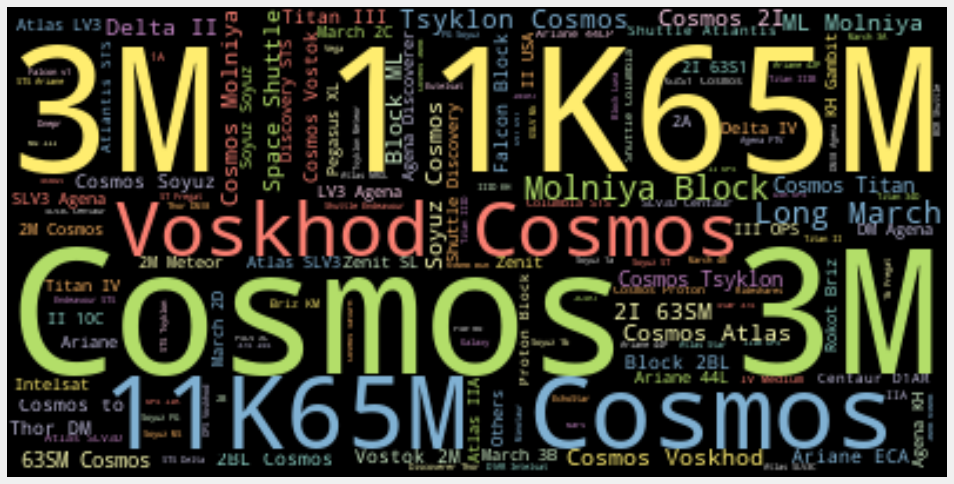

In [12]:
text = ",".join(review for review in data.Detail)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

<p style="font-size: 18px">I thought it would be fun to check what are the words most used in the details of the rockets description.<br><br>This data don't seem to have any more to tell other than those.</p>

<p style='font-size:18px'>The only numerical variable in the dataset is useless due to having almost 77% null values.<br><br>I think I will end my analysis at this point.<br><br>Do leave an upvote if you like the analysis.</p>